# Breast Cancer Diagnostic
## Description
Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | Sample code number | 1 - 10 |
| 2   |  Clump Thickness   | 1 - 10 |
| 3   | Uniformity of Cell Size        | 1 - 10 |
| 4   | Uniformity of Cell Shape       | 1 - 10 |
| 5   | Marginal Adhesion         | 1 - 10 |
| 6   | Single Epithelial Cell Size         | 1 - 10 |
| 7   | Bare Nuclei        | 1 - 10 |
| 8   | Bland Chromatin         | 1 - 10 |
| 9   | Normal Nucleoli        | 1 - 10 |
| 10  | Mitoses          | 1 - 10 |
| 11  | Class       | 2 for benign, 4 for malignant |


## Importing the Dataset

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("../../datasets/classification/cancer-data", header = None)

## Preparing the Dataset

In [4]:
#Replace question marks with NaN notation to make use of dropna() function
data = data.replace("?", np.nan) 

#Drop rows containing NaN
data = data.dropna() 

X = (data.iloc[:,1:data.shape[1]-1]).to_numpy()
y = (data.iloc[:,data.shape[1]-1:data.shape[1]]).to_numpy().flatten()


The following block prints the shape and column datatypes of the processed dataset.


In [5]:
print(data.shape)
print(data.dtypes)

(683, 11)
0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object


## Preprocessing the Dataset

In [6]:
from sklearn.model_selection import train_test_split

X = (data.iloc[:,1:data.shape[1]-1]).to_numpy()
y = (data.iloc[:,data.shape[1]-1:data.shape[1]]).to_numpy().flatten()

# Split the data set into a 60:20:20 (train:test:val) ratio
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)

## Training on Multiple Classifiers

In [7]:
# Manage imports
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
from sklearn.naive_bayes import GaussianNB
import sklearn.neural_network
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...


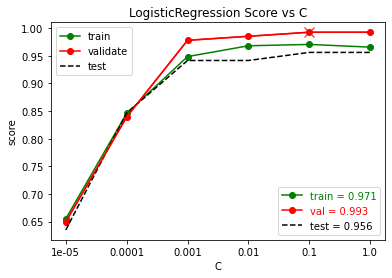

In [6]:
adjusted_parameter = 'C'
adjusted_parameter_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

LogisticRegressionEstimators = train_estimators(X_train, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter,
                                                adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                      adjusted_parameter,adjusted_parameter_values,
                      X_train, y_train, X_test, y_test, X_val, y_val)

## SVM Classification

Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1000.0, gamma=0.0001, max_iter=10000, random_state=0)...


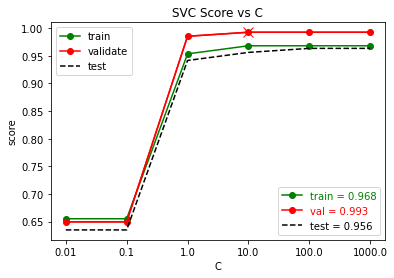

In [7]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1,1.0,10.0,100.0,1000.0]

SVMEstimators = train_estimators(X_train, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000,
                                    random_state=0)

plot_estimator_scores(SVMEstimators,
                      adjusted_parameter, adjusted_parameter_values,
                      X_train, y_train, X_test, y_test, X_val, y_val)

## Decision Tree Classification

Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=0)...


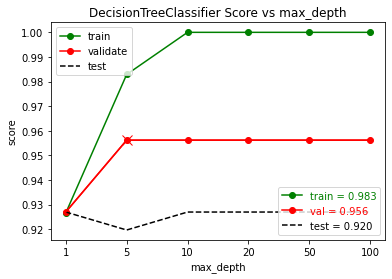

In [8]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)

## RandomForest Classification

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...


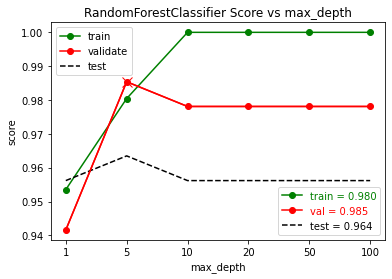

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)

## K-nearest Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...


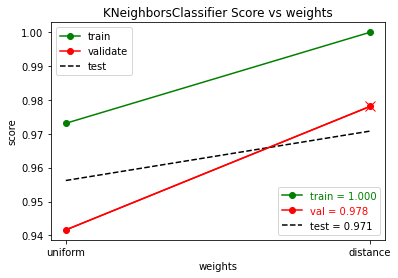

In [10]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...


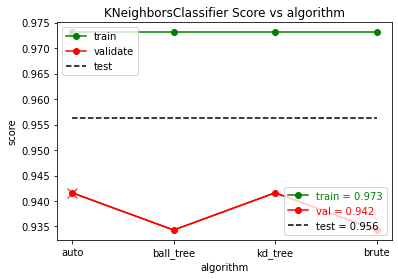

In [11]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)



## Ada Boost Classification

Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...


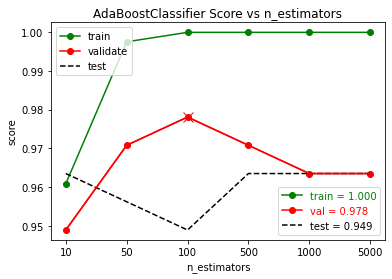

In [12]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)

## Gaussian Naive Bayes Classification

In [9]:
gaussian_nb = sklearn.naive_bayes.GaussianNB()
NaiveBayesEstimator = gaussian_nb.fit(X_train, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(X_train, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(X_test, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(X_val, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

gaussian_nb_train_score=0.9584352078239609, gaussian_nb_val_score=0.9854014598540146, gaussian_nb_test_score=0.9416058394160584


### Neural Network Classification Through a Multi-Layer Perceptron

In [11]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(X_train, y_train)

print(f'Training Score: {mlp.score(X_train, y_train)}')
print(f'Testing Score: {mlp.score(X_test, y_test)}')
print(f'Validation Score: {mlp.score(X_val, y_val)}')

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(16), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(X_train, y_train)

print(f'Training Score: {mlp.score(X_train, y_train)}')
print(f'Testing Score: {mlp.score(X_test, y_test)}')
print(f'Validation Score: {mlp.score(X_val, y_val)}')


Iteration 1, loss = 1.38785871
Iteration 2, loss = 0.97746055
Iteration 3, loss = 0.68427606
Iteration 4, loss = 0.58417027
Iteration 5, loss = 0.60023593
Iteration 6, loss = 0.58139094
Iteration 7, loss = 0.52370762
Iteration 8, loss = 0.49315722
Iteration 9, loss = 0.48237241
Iteration 10, loss = 0.47112541
Iteration 11, loss = 0.45309571
Iteration 12, loss = 0.42992000
Iteration 13, loss = 0.41451206
Iteration 14, loss = 0.40375036
Iteration 15, loss = 0.39267344
Iteration 16, loss = 0.38407402
Iteration 17, loss = 0.37464453
Iteration 18, loss = 0.36492157
Iteration 19, loss = 0.35958845
Iteration 20, loss = 0.35625857
Iteration 21, loss = 0.34845760
Iteration 22, loss = 0.33777681
Iteration 23, loss = 0.33280831
Iteration 24, loss = 0.32849370
Iteration 25, loss = 0.32306215
Iteration 26, loss = 0.31851516
Iteration 27, loss = 0.31380984
Iteration 28, loss = 0.31004426
Iteration 29, loss = 0.30647540
Iteration 30, loss = 0.30202975
Iteration 31, loss = 0.29910991
Iteration 32, los

Iteration 324, loss = 0.10933694
Iteration 325, loss = 0.10703726
Iteration 326, loss = 0.10870305
Iteration 327, loss = 0.10862190
Iteration 328, loss = 0.10641298
Iteration 329, loss = 0.10592252
Iteration 330, loss = 0.10640789
Iteration 331, loss = 0.10659793
Iteration 332, loss = 0.10590299
Iteration 333, loss = 0.10573846
Iteration 334, loss = 0.10549310
Iteration 335, loss = 0.10528303
Iteration 336, loss = 0.10515026
Iteration 337, loss = 0.10518609
Iteration 338, loss = 0.10502334
Iteration 339, loss = 0.10622244
Iteration 340, loss = 0.10642446
Iteration 341, loss = 0.10539800
Iteration 342, loss = 0.10537666
Iteration 343, loss = 0.10604138
Iteration 344, loss = 0.10491740
Iteration 345, loss = 0.10454560
Iteration 346, loss = 0.10406323
Iteration 347, loss = 0.10453437
Iteration 348, loss = 0.10543555
Iteration 349, loss = 0.10564291
Iteration 350, loss = 0.10379976
Iteration 351, loss = 0.10501236
Iteration 352, loss = 0.10557602
Iteration 353, loss = 0.10378959
Iteration 